# Analysis : Effects of Regime changes on National Social Factors

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def transform_dataframe(df,countries,df_name,from_column,to_column,prefix,sep,rename_flag) -> pd.DataFrame:
    """
    Returns a transformed dataframe which contains a subset interested countries along with the corresponding region of each of the countries.
    """
    countries_regex_expr=''
    countries_regex_expr=countries_regex_expr.join(val+'|' if i != len(countries)-1 else val for i,val in enumerate(countries))
    filter=df['Region, subregion, country or area *'].str.contains(countries_regex_expr,regex=True) 
    sub_region_filter=df['Type']=='Subregion'
    subregion_df=df[sub_region_filter]
    df=df[filter]
    df=df.merge(subregion_df[['Region, subregion, country or area *','Country code']],left_on='Parent code',right_on='Country code',suffixes=('_left','_right'))
    df.drop('Country code_right',axis=1,inplace=True)
    rename_dict={'Region, subregion, country or area *_left':'Country',
             'Region, subregion, country or area *_right':'Region',
            'Country code_left':'Country code'}
    df.rename(columns=rename_dict,inplace=True)
    df.drop(columns=['Notes'],axis=1,inplace=True)
    df=df.drop_duplicates()
    df = df.infer_objects()
    df.name=df_name
    if rename_flag:
      if prefix!='':
        df=rename_columns(df,from_column,to_column,prefix,sep)
      else:
        df=rename_columns(df,from_column,to_column,df.name,sep)
    return df

In [3]:
def rename_columns(df,from_column,to_column,prefix,sep):
  rename_dict={}
  for column in df.columns[from_column:to_column]:
    rename_dict[column]=prefix+sep+column
  df.rename(columns=rename_dict,inplace=True)
  return df

In [4]:
def form_dataframe(filepath,sheet,header):
    data=pd.read_excel(filepath,sheet_name=sheet,header=header)
    #display(data.head().append(data.tail()))
    return data

In [5]:
def check_null_columns(df):
    return df.columns[df.isna().any()].tolist()

In [6]:
def get_melted_dataframes(list_df):
    ret_list=[]
    for df in list_df:
      ret_list.append(df.melt(id_vars=[df.columns[2],
                                       df.columns[-1]], 
                              value_vars=df.columns[6:-1],
                              var_name='Period', 
                              value_name=df.name))
    return ret_list

In [7]:
def display_dataframe(filepath,sheet,header,countries,df_name,from_column=0,to_column=0,prefix='',sep=' ',rename_flag=False):
  df=form_dataframe(filepath,sheet,header)
  df=transform_dataframe(df,countries,df_name,from_column,to_column,prefix,sep,rename_flag)
  print('Columns containing null values : {}'.format(check_null_columns(df)))
  return df

## Summary of Regime changes

We have short-listed the following 6 countries for our analysis:
  * Iraq
  * Myanmar
  * Afghanistan
  * Libya
  * Germany
  * Venezuela

In [8]:
events_df=form_dataframe('events_table.xlsx','Sheet1',0)
events_df

,Country,Year,Type,Event,Description
0,Iraq,1958,Coup,Abd-al-Karim Qasim takes charge,Monarchy is overthrown in a left-wing military...
1,Iraq,1963,Coup,Qasim's government overthrown,Prime Minister Qasim is ousted in a coup led b...
2,Iraq,1968,Coup,A Baathist coup,A Baathist led-coup puts Ahmad Hasan al-Bakr i...
3,Iraq,1979,Coup,Saddam Hussein seizes power,Saddam Hussein takes over from President Al-Bakr.
4,Iraq,2006,Liberation/Revolution,New Government after elections,Newly re-elected President Talabani asks Shia ...
5,Iraq,2011,Transition,Broad Government,Shia politician Haider al-Abad forms a broad-b...
6,Myanmar,1948,Independence,Myanmar achieves Independence,Myanmar becomes independent
7,Myanmar,1958,Coup,Split in AFPFL party,"Caretaker government, led by army Chief of St..."
8,Myanmar,1962,Coup,Burmese Socialism,U Nu's faction ousted in military coup led by ...
9,Myanmar,1974,Transition,New Constitution,"New constitution comes into effect, transferri..."


## Loading of DataFrames based on Social Factors

In [9]:
mortality_all_gender=display_dataframe('WPP2019_MORT_F03_1_DEATHS_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_all_gender')
mortality_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,181.252,185.881,159.423,146.729,135.906,124.096,115.421,115.490,114.401,120.234,128.968,135.590,160.609,168.440,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,845.185,687.761,621.679,588.395,585.465,593.546,746.643,648.737,609.575,629.263,708.288,815.068,848.438,908.877,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,1476.605,1455.605,1459.784,1490.896,1520.938,1473.434,1237.477,1007.309,1079.813,1218.352,1263.923,1250.888,1192.155,1194.929,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,2587.238,2411.746,2384.824,2264.199,2275.610,2302.260,2320.254,2278.092,2269.462,2283.810,2311.177,2289.062,2204.708,2192.754,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,363.026,382.870,389.057,393.444,383.961,401.800,430.594,470.620,520.020,587.124,647.904,739.782,856.046,1017.236,South America
5,249,Estimates,Germany,276,Country/Area,926,3934.205,4178.169,4437.632,4737.339,4881.899,4852.089,4756.026,4614.786,4504.374,4341.218,4204.730,4211.824,4442.795,4618.754,Western Europe


In [10]:
mortality_male=display_dataframe('WPP2019_MORT_F03_2_DEATHS_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_male')
mortality_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,98.830,100.471,86.909,80.373,76.333,70.110,65.698,65.842,65.114,68.497,73.200,78.458,95.016,98.117,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,439.820,344.200,306.013,292.684,295.486,303.167,477.089,386.058,350.492,358.927,388.652,469.138,462.600,492.354,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,794.020,783.110,777.437,790.745,802.414,775.431,651.457,531.357,573.875,650.627,675.302,669.978,641.196,646.140,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,1407.869,1310.493,1295.014,1226.378,1236.832,1253.691,1266.800,1242.929,1229.662,1227.918,1231.914,1236.950,1185.997,1160.486,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,195.984,208.096,212.937,219.698,219.389,232.959,250.814,273.412,303.450,348.154,388.830,440.642,502.162,583.223,South America
5,249,Estimates,Germany,276,Country/Area,926,1963.643,2134.778,2249.134,2366.510,2390.043,2339.811,2247.310,2141.214,2093.930,2023.907,1973.691,2007.366,2154.555,2285.197,Western Europe


In [11]:
mortality_female=display_dataframe('WPP2019_MORT_F03_3_DEATHS_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_female')
mortality_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,82.422,85.410,72.514,66.356,59.573,53.986,49.723,49.648,49.287,51.737,55.768,57.132,65.593,70.323,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,405.365,343.561,315.666,295.711,289.979,290.379,269.554,262.679,259.083,270.336,319.636,345.930,385.838,416.523,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,682.585,672.495,682.347,700.151,718.524,698.003,586.020,475.952,505.938,567.725,588.621,580.910,550.959,548.789,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,1179.369,1101.253,1089.810,1037.821,1038.778,1048.569,1053.454,1035.163,1039.800,1055.892,1079.263,1052.112,1018.711,1032.268,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,167.042,174.774,176.120,173.746,164.572,168.841,179.780,197.208,216.570,238.970,259.074,299.140,353.884,434.013,South America
5,249,Estimates,Germany,276,Country/Area,926,1970.562,2043.391,2188.498,2370.829,2491.856,2512.278,2508.716,2473.572,2410.444,2317.311,2231.039,2204.458,2288.240,2333.557,Western Europe


In [12]:
mortality_by_age=display_dataframe('WPP2019_MORT_F04_1_DEATHS_BY_AGE_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'mortality_by_age',
                                   from_column=7,to_column=-1,rename_flag=True)
mortality_by_age

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,Period,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,mortality_by_age 15-19,mortality_by_age 20-24,mortality_by_age 25-29,mortality_by_age 30-34,mortality_by_age 35-39,mortality_by_age 40-44,mortality_by_age 45-49,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+,Region
0,1163,Estimates,Libya,434,Country/Area,912,1950-1955,97.821,5.720,2.595,3.316,4.171,4.108,3.896,3.726,3.713,3.779,4.268,5.437,6.851,8.117,9.019,7.877,4.461,1.763,0.507,0.106,Northern Africa
14,1164,Estimates,Libya,434,Country/Area,912,1955-1960,103.407,6.094,2.728,3.493,4.295,4.243,4.252,4.164,3.939,4.001,4.366,5.066,6.387,7.635,7.946,7.252,4.580,1.620,0.354,0.059,Northern Africa
28,1165,Estimates,Libya,434,Country/Area,912,1960-1965,85.429,5.094,2.410,3.011,3.764,3.673,3.696,3.824,3.774,3.735,4.163,4.699,5.498,6.639,7.197,6.325,4.322,1.770,0.355,0.045,Northern Africa
42,1166,Estimates,Libya,434,Country/Area,912,1965-1970,77.184,4.362,2.169,2.689,3.231,3.191,3.204,3.371,3.586,3.769,4.100,4.686,5.368,6.069,6.782,6.295,4.260,1.911,0.450,0.049,Northern Africa
56,1167,Estimates,Libya,434,Country/Area,912,1970-1975,67.139,3.971,2.018,2.527,2.944,2.780,2.846,3.022,3.335,3.824,4.383,4.842,5.604,6.247,6.644,6.406,4.660,2.100,0.542,0.071,Northern Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,3482,Estimates,Germany,276,Country/Area,926,1995-2000,22.672,2.847,3.314,11.232,15.180,18.658,27.876,42.165,61.308,82.765,122.474,200.690,294.410,384.897,511.916,566.713,680.371,763.490,413.715,114.523,Western Europe
1120,3483,Estimates,Germany,276,Country/Area,926,2000-2005,18.859,2.192,2.719,9.358,12.502,12.729,18.850,34.450,57.982,86.516,115.171,165.013,262.630,374.637,478.410,624.610,650.471,634.930,483.241,159.462,Western Europe
1134,3484,Estimates,Germany,276,Country/Area,926,2005-2010,15.050,1.721,2.125,6.656,9.953,10.944,13.725,24.064,47.984,83.459,120.646,157.367,220.152,340.474,477.958,602.729,761.962,667.876,439.740,207.238,Western Europe
1148,3485,Estimates,Germany,276,Country/Area,926,2010-2015,13.957,1.533,1.668,5.193,8.138,10.104,13.037,18.405,35.560,72.812,123.145,171.143,219.753,299.098,458.974,652.586,788.704,840.687,497.973,210.326,Western Europe


In [13]:
life_expectancy_all_gender=display_dataframe('WPP2019_MORT_F07_1_LIFE_EXPECTANCY_0_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_all_gender')
life_expectancy_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,36.672,38.987,46.887,53.317,58.407,62.470,65.567,67.515,69.348,70.429,71.259,72.335,71.736,72.701,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,37.935,44.915,50.879,56.354,59.508,61.719,58.544,64.142,67.326,69.020,68.770,67.999,69.398,70.368,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,28.612,31.132,33.744,36.152,38.742,41.631,44.967,48.563,51.962,54.670,56.996,59.632,62.321,64.279,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,36.373,40.932,43.696,47.488,49.844,51.907,53.910,55.978,57.650,59.257,60.868,62.441,64.679,66.759,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,55.469,58.399,61.184,63.604,66.149,67.842,69.140,70.212,71.032,71.624,72.571,72.994,73.069,72.126,South America
5,249,Estimates,Germany,276,Country/Area,926,67.523,68.908,69.975,70.666,71.147,72.301,73.647,74.993,75.981,77.311,78.620,79.732,80.445,81.101,Western Europe


In [14]:
life_expectancy_male=display_dataframe('WPP2019_MORT_F07_2_LIFE_EXPECTANCY_0_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_male')
life_expectancy_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,35.60,37.87,45.67,51.98,56.63,60.74,63.90,65.93,67.81,68.83,69.55,70.14,68.87,69.90,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,37.02,45.03,51.48,56.75,59.48,61.32,52.55,60.29,64.39,66.35,66.61,64.93,67.20,68.33,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,27.94,30.43,32.99,35.37,37.92,40.78,44.06,47.54,50.89,53.52,55.79,58.34,60.93,62.85,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,33.68,38.12,40.88,44.69,46.90,48.83,50.69,52.71,54.46,56.16,57.86,59.08,61.29,63.67,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,54.05,56.85,59.48,61.50,63.64,65.11,66.28,67.32,67.97,68.21,68.87,69.25,69.36,68.40,South America
5,249,Estimates,Germany,276,Country/Area,926,65.30,66.30,67.12,67.61,67.89,68.89,70.20,71.59,72.54,74.02,75.59,76.99,77.94,78.67,Western Europe


In [15]:
life_expectancy_female=display_dataframe('WPP2019_MORT_F07_3_LIFE_EXPECTANCY_0_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_female')
life_expectancy_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,37.85,40.21,48.25,54.83,60.44,64.49,67.53,69.41,71.17,72.33,73.25,74.86,74.93,75.74,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,38.88,44.80,50.27,55.93,59.51,62.11,65.85,68.32,70.46,71.87,71.06,71.33,71.64,72.42,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,29.43,31.97,34.64,37.06,39.67,42.58,45.96,49.66,53.09,55.93,58.29,61.02,63.79,65.81,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,39.31,43.97,46.71,50.46,52.96,55.15,57.28,59.37,60.93,62.41,63.88,65.81,68.02,69.75,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,57.02,60.09,63.05,65.93,68.93,70.86,72.26,73.33,74.31,75.28,76.54,76.99,77.01,76.08,South America
5,249,Estimates,Germany,276,Country/Area,926,69.60,71.30,72.56,73.42,74.07,75.33,76.68,77.98,79.12,80.35,81.46,82.37,82.91,83.55,Western Europe


In [16]:
life_expectancy_b40_all_gender=display_dataframe('WPP2019_MORT_F08_1_Q0040_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b40_all_gender')
life_expectancy_b40_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,501.24444,469.40051,360.47018,273.92241,207.99746,157.34929,120.37883,98.30890,79.40243,68.19462,59.93536,52.17298,58.31781,51.90438,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,490.14788,393.48558,312.55048,239.39559,197.87600,168.77355,253.36354,170.08201,122.69854,99.23022,89.32282,95.58379,81.52174,71.87393,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,626.54322,589.62098,551.35891,516.56479,479.47607,438.63343,392.16215,343.09468,296.82017,259.82156,229.25550,195.19752,161.59158,137.57821,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,513.61477,449.02186,410.49554,357.87574,325.63520,297.38119,270.15861,242.23327,220.11589,199.25721,178.76166,159.35168,132.59068,108.96552,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,237.63777,204.70334,173.98324,149.09685,122.43257,103.75579,88.78965,78.18596,73.90902,77.15982,74.70834,70.80936,69.51588,81.12081,South America
5,249,Estimates,Germany,276,Country/Area,926,99.70073,82.66094,71.08125,61.76413,58.90803,50.81185,41.59832,34.08407,31.66835,26.09503,21.50517,17.99208,16.10054,15.53499,Western Europe


In [17]:
life_expectancy_b40_male=display_dataframe('WPP2019_MORT_F08_2_Q0040_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b40_male')
life_expectancy_b40_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,510.22375,478.52509,369.58083,283.18731,221.70080,169.17691,130.40785,107.07478,86.93842,76.32533,68.17557,61.85058,77.20991,68.95016,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,494.90989,382.98425,295.08095,225.00025,189.06213,164.22138,357.67239,232.62512,159.16630,123.78691,100.90931,116.23920,92.72096,81.58443,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,630.86963,593.57266,555.70130,520.72540,483.50539,442.54044,396.08017,347.82664,300.98409,265.11891,234.76046,201.46123,168.51069,144.81480,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,544.96873,481.03604,441.34946,387.49644,356.22947,329.38092,303.64462,275.28158,251.05963,228.07107,205.37959,189.17860,161.17910,132.26342,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,253.74600,220.62164,189.74938,166.67494,141.54308,124.16670,109.32575,98.68086,96.90083,108.08183,108.75805,103.72192,101.90482,113.91312,South America
5,249,Estimates,Germany,276,Country/Area,926,117.91808,97.78319,85.33596,75.41388,73.24953,63.89706,52.56624,43.45427,41.58304,34.20073,27.89999,23.09654,20.34418,19.87322,Western Europe


In [18]:
life_expectancy_b40_female=display_dataframe('WPP2019_MORT_F08_3_Q0040_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b40_female')
life_expectancy_b40_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,491.85840,459.99200,350.74842,263.95340,193.04077,144.18119,108.82500,88.24090,71.05125,59.41223,51.08066,41.79346,38.17928,34.03713,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,484.89631,403.80133,329.87235,254.05877,207.05165,173.59886,129.02363,103.24536,85.10088,73.72349,77.26391,73.67196,69.64783,61.57491,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,622.00332,585.08616,546.60962,511.96009,475.12702,434.45661,388.07449,338.16215,292.42106,254.19809,223.35162,188.48667,154.18087,129.81425,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,480.38237,415.50223,378.00222,326.96221,293.78364,264.39007,236.00729,208.94397,189.03562,170.33414,152.10643,129.35089,103.68959,85.42755,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,220.44575,187.77175,157.29125,130.51776,102.28295,82.26628,67.22181,56.69474,49.79401,44.56512,38.84360,36.33437,35.74402,47.16089,South America
5,249,Estimates,Germany,276,Country/Area,926,82.06124,67.72302,56.38368,47.14918,43.43695,36.75081,29.85810,24.09692,21.12792,17.53766,14.81566,12.68862,11.67637,10.91022,Western Europe


In [19]:
life_expectancy_b60_all_gender=display_dataframe('WPP2019_MORT_F09_1_Q0060_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b60_all_gender')
life_expectancy_b60_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,663.16410,634.49274,528.19576,437.56001,363.25166,302.54590,255.69432,225.60742,197.26622,181.38485,169.42245,154.25729,172.11867,156.13400,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,657.01420,563.77318,478.89630,400.64608,354.20132,323.73505,392.07984,279.98259,229.24059,201.72742,209.79272,226.48277,201.96451,187.27329,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,798.67049,767.29954,733.37402,701.18437,665.61366,624.85477,576.48989,523.46459,473.56395,432.04117,396.03138,354.66588,312.39702,281.14888,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,695.96952,636.92575,598.48064,552.31703,516.79539,485.86019,455.06963,422.06489,396.18151,370.59531,344.75244,318.65738,281.10604,245.21516,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,435.85582,389.69040,345.60904,307.47297,268.57284,241.94923,220.06448,205.15778,194.70635,189.05802,178.73107,172.83557,170.60477,180.46892,South America
5,249,Estimates,Germany,276,Country/Area,926,218.42872,197.76911,183.28134,172.89920,168.54927,158.12308,144.47903,130.63258,122.26245,107.27142,96.21847,86.09469,78.72111,76.10145,Western Europe


In [20]:
life_expectancy_b60_male=display_dataframe('WPP2019_MORT_F09_2_Q0060_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b60_male')
life_expectancy_b60_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,682.21325,655.34376,552.61570,464.30527,396.03028,333.43352,284.08267,251.64579,221.00231,205.17215,194.71461,185.76990,219.63598,197.19947,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,673.59380,559.71559,464.27651,389.55528,351.22803,328.15818,501.31379,339.99778,274.38515,240.43611,243.69791,280.05309,236.84792,217.99075,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,813.56749,783.33718,750.93921,719.53636,684.61585,644.44404,596.72816,545.58468,495.23233,454.59699,418.73571,377.83712,335.76296,304.44772,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,737.60914,684.00877,646.75181,603.33995,571.00823,543.14821,515.29225,483.13856,455.66412,428.47777,400.91725,381.60806,342.23067,299.29115,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,459.52538,415.61118,373.82799,342.15457,310.05828,286.50604,265.82513,251.19127,243.12440,243.34390,236.48362,230.20997,227.03002,236.87044,South America
5,249,Estimates,Germany,276,Country/Area,926,256.91865,241.88040,228.32723,218.98202,215.91107,205.35435,188.96378,170.77518,160.80193,140.36048,124.94233,111.34533,100.76703,98.63460,Western Europe


In [21]:
life_expectancy_b60_female=display_dataframe('WPP2019_MORT_F09_3_Q0060_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b60_female')
life_expectancy_b60_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,641.13973,611.20307,500.80944,407.32489,325.26535,265.75378,220.90158,193.42593,168.13957,152.71625,140.10043,119.86074,121.18036,112.63881,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,640.45372,568.11326,493.45085,412.04448,357.54389,319.44702,256.03873,215.20687,181.59819,160.68575,174.58781,171.37471,167.77502,157.10391,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,779.40012,747.40560,712.58326,679.99500,644.11774,603.07242,554.53736,500.34975,450.69418,407.97688,372.12623,330.07504,287.18041,255.78986,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,649.51383,585.28014,546.03165,497.62676,458.99081,425.15555,391.67511,358.36253,334.93806,312.16212,289.43109,257.34314,222.00888,193.27971,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,409.54847,361.20230,314.98870,269.98833,223.81735,194.16896,171.34979,156.44267,143.46756,131.11981,117.06659,112.00522,111.23968,121.80725,South America
5,249,Estimates,Germany,276,Country/Area,926,184.02521,158.18382,143.58710,133.40748,127.23730,114.94660,100.67068,88.54874,81.10828,72.22302,65.99112,59.75899,55.82340,52.62462,Western Europe


In [22]:
life_expectancy_b80_all_gender=display_dataframe('WPP2019_MORT_F14_1_LIFE_EXPECTANCY_80_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b80_all_gender')
life_expectancy_b80_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,3.973903,4.116831,4.484755,4.763292,4.999557,5.203147,5.376591,5.513112,5.670614,5.761948,5.837928,6.050073,6.060275,6.218912,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,4.607036,4.862212,5.079942,5.248780,5.349270,5.404401,5.558196,5.700185,5.885752,6.021585,5.870455,5.795173,5.885853,5.947441,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,3.759073,3.937620,4.111893,4.264341,4.419571,4.582722,4.753267,4.918179,5.051920,5.156664,5.246519,5.347880,5.453213,5.532900,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,4.361784,4.585923,4.727436,4.832478,4.954470,5.044022,5.127315,5.214092,5.274033,5.333715,5.393775,5.468548,5.569531,5.674572,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,6.479677,6.684255,6.857994,7.003573,7.080011,7.141439,7.305992,7.554879,7.884252,8.199116,8.499655,8.579078,8.560470,8.542984,South America
5,249,Estimates,Germany,276,Country/Area,926,5.403836,5.486040,5.603152,5.679896,5.820969,6.081953,6.397183,6.777529,7.246557,7.729933,8.149872,8.458205,8.652151,9.278767,Western Europe


In [23]:
life_expectancy_b80_male=display_dataframe('WPP2019_MORT_F14_2_LIFE_EXPECTANCY_80_MALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b80_male')
life_expectancy_b80_male

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,3.980162,4.097644,4.414258,4.658886,4.853365,5.034281,5.187214,5.311038,5.445062,5.512221,5.546534,5.580595,5.581236,5.644967,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,4.454304,4.790301,5.009445,5.147301,5.209187,5.228771,5.335024,5.437715,5.524693,5.587956,5.468348,5.284140,5.468389,5.538991,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,3.651053,3.816018,3.974943,4.115291,4.257862,4.407234,4.568754,4.714199,4.829708,4.924176,5.008176,5.104346,5.203194,5.277471,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,4.066865,4.248280,4.378170,4.460681,4.561651,4.639130,4.711426,4.789272,4.851927,4.915939,4.981624,5.023548,5.129612,5.247881,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,6.216466,6.358227,6.441890,6.499914,6.526883,6.487183,6.539260,6.792998,7.061006,7.319177,7.477128,7.477128,7.454179,7.431350,South America
5,249,Estimates,Germany,276,Country/Area,926,5.231237,5.203063,5.268689,5.253820,5.296660,5.384096,5.551744,5.795926,6.156129,6.571335,7.037850,7.451659,7.718360,8.527928,Western Europe


In [24]:
life_expectancy_b80_female=display_dataframe('WPP2019_MORT_F14_3_LIFE_EXPECTANCY_80_FEMALE.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'life_expectancy_b80_female')
life_expectancy_b80_female

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,3.963700,4.145076,4.579919,4.898224,5.177670,5.389121,5.559763,5.695684,5.868973,5.976501,6.089812,6.465439,6.465432,6.688834,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,4.732506,4.918792,5.136589,5.332842,5.465008,5.546760,5.737628,5.912805,6.182350,6.371827,6.182350,6.182350,6.182350,6.239977,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,3.901925,4.086306,4.269769,4.427404,4.588647,4.759305,4.942354,5.129554,5.264321,5.366062,5.453596,5.558059,5.664906,5.743075,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,4.563360,4.813031,4.955937,5.071006,5.201536,5.294129,5.380799,5.470167,5.525600,5.580351,5.636321,5.729655,5.826306,5.926326,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,6.715103,6.971833,7.223952,7.445639,7.560208,7.709657,7.957353,8.166656,8.522787,8.866886,9.274693,9.410476,9.387572,9.364014,South America
5,249,Estimates,Germany,276,Country/Area,926,5.534111,5.703108,5.841776,5.950703,6.105782,6.425614,6.809921,7.250581,7.744621,8.242884,8.641015,8.959909,9.209737,9.791504,Western Europe


In [25]:
tot_population_all_gender=display_dataframe('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'tot_population_all_gender')
tot_population_all_gender

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Region
0,85,Estimates,Libya,434,Country/Area,912,1124.519,1142.975,1163.890,1187.740,1214.823,1245.355,1279.403,1316.913,1357.732,1401.631,1448.416,1498.076,1550.815,1607.168,1667.822,1733.307,1803.689,1878.869,1958.909,2043.820,2133.527,2228.142,2327.487,2430.754,2536.895,2645.136,2754.698,2865.639,2979.102,3096.724,3219.462,3347.779,3480.443,3614.682,3746.712,3873.781,3994.601,4109.717,4220.451,4328.935,4436.663,4544.245,4650.896,4755.134,4854.871,4948.796,5036.173,5118.008,5196.774,5275.921,5357.893,5443.249,5531.097,5620.545,5710.163,5798.615,5886.874,5974.786,6058.740,6133.987,6197.667,6247.438,6285.751,6320.350,6362.039,6418.315,6492.160,6580.723,6678.565,6777.453,6871.287,Northern Africa
1,96,Estimates,Iraq,368,Country/Area,922,5719.183,5901.510,6065.011,6216.129,6360.437,6502.661,6646.635,6795.398,6951.159,7115.505,7289.753,7475.349,7674.217,7888.910,8122.199,8375.795,8651.162,8947.397,9260.687,9585.585,9917.978,10255.853,10599.661,10950.888,11312.062,11684.579,12068.675,12462.059,12860.678,13259.107,13653.348,14044.115,14432.466,14815.653,15190.396,15555.807,15909.764,16257.072,16612.319,16994.942,17419.113,17889.457,18402.740,18955.087,19539.348,20149.342,20783.073,21439.579,22114.330,22802.061,23497.589,24208.178,24931.922,25644.503,26313.838,26922.279,27448.124,27911.242,28385.739,28973.157,29741.977,30725.305,31890.012,33157.061,34411.949,35572.269,36610.632,37552.789,38433.604,39309.789,40222.503,Western Asia
2,117,Estimates,Afghanistan,4,Country/Area,5501,7752.117,7840.151,7935.996,8039.684,8151.316,8270.992,8398.873,8535.157,8680.097,8833.947,8996.967,9169.406,9351.442,9543.200,9744.772,9956.318,10174.840,10399.936,10637.064,10893.772,11173.654,11475.450,11791.222,12108.963,12412.960,12689.164,12943.093,13171.294,13341.199,13411.060,13356.500,13171.679,12882.518,12537.732,12204.306,11938.204,11736.177,11604.538,11618.008,11868.873,12412.311,13299.016,14485.543,15816.601,17075.728,18110.662,18853.444,19357.126,19737.770,20170.847,20779.957,21606.992,22600.774,23680.871,24726.689,25654.274,26433.058,27100.542,27722.281,28394.806,29185.511,30117.411,31161.378,32269.592,33370.804,34413.603,35383.028,36296.111,37171.922,38041.757,38928.341,Southern Asia
3,142,Estimates,Myanmar,104,Country/Area,920,17779.635,18103.970,18440.675,18792.741,19162.186,19550.067,19956.404,20380.220,20819.752,21272.677,21736.947,22211.626,22697.664,23198.238,23717.785,24259.356,24823.937,25410.054,26015.239,26635.852,27269.063,27913.749,28570.093,29238.168,29918.469,30611.093,31314.347,32026.748,32748.782,33481.397,34224.316,34976.465,35734.273,36491.804,37241.530,37977.087,38698.484,39404.350,40085.653,40731.439,41335.188,41890.192,42401.686,42889.992,43383.421,43901.598,44452.203,45027.223,45611.220,46181.075,46719.698,47225.119,47702.163,48148.907,48564.489,48949.931,49301.049,49621.479,49929.642,50250.366,50600.827,50990.612,51413.703,51852.464,52280.816,52680.724,53045.199,53382.521,53708.318,54045.422,54409.794,South-Eastern Asia
4,201,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,5481.976,5726.610,5974.437,6226.290,6482.858,6744.704,7012.177,7285.566,7564.987,7850.420,8141.839,8439.261,8742.780,9052.632,9369.101,9692.281,10022.592,10359.741,10702.281,11048.256,11396.396,11745.952,12097.696,12453.709,12816.954,13189.511,13572.210,13964.377,14364.726,14771.270,15182.616,15597.878,16017.570,16443.128,16876.703,17319.513,17772.000,18232.733,18698.850,19166.474,19632.665,20096.314,20557.694,21016.900,21474.553,21931.087,22385.650,22837.743,23288.567,23739.835,24192.449,24646.471,25100.407,25551.624,25996.594,26432.445

In [26]:
migration=display_dataframe('WPP2019_MIGR_F02_NET_NUMBER_OF_MIGRANTS.xlsx',
                                       'ESTIMATES',
                                       16,
                                       ['Iraq','Myanmar','Afghanistan','Libya','Germany','Venezuela'],
                                       'migration')
migration

Columns containing null values : []


,Index,Variant,Country,Country code,Type,Parent code,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015,2015-2020,Region
0,84,Estimates,Libya,434,Country/Area,912,0.000,46.022,45.891,48.002,58.665,57.534,113.380,5.490,3.965,-57.368,-20.569,-118.555,-300.002,-9.997,Northern Africa
1,95,Estimates,Iraq,368,Country/Area,922,-0.550,-1.100,-1.862,-6.877,-8.587,-47.791,-199.939,-647.664,-154.026,-17.859,-266.320,-1102.117,1303.607,39.171,Western Asia
2,116,Estimates,Afghanistan,4,Country/Area,5501,-20.000,-20.000,-20.000,-20.000,-20.000,-1153.959,-3345.095,-1525.351,3076.383,-867.540,744.193,-1046.361,521.769,-314.602,Southern Asia
3,141,Estimates,Myanmar,104,Country/Area,920,0.000,0.000,0.000,0.000,0.000,0.000,-54.656,-200.000,-713.704,-537.998,-1208.092,-1336.928,-528.211,-816.564,South-Eastern Asia
4,188,Estimates,Venezuela (Bolivarian Republic of),862,Country/Area,931,220.074,79.820,18.870,3.160,0.940,1.120,1.380,0.920,-2.270,-4.540,-22.740,-200.220,-431.040,-3266.243,South America
5,249,Estimates,Germany,276,Country/Area,926,-42.001,39.829,669.314,871.265,701.731,228.894,0.023,1683.737,2628.459,715.944,824.445,43.087,1938.576,2719.112,Western Europe


## Consolidation of individual DataFrames

In [27]:
stat_dataframes=get_melted_dataframes([
                                       mortality_all_gender,
                                                  mortality_male,
                                                  mortality_female,
                                                  life_expectancy_all_gender,
                                                  life_expectancy_male,
                                                  life_expectancy_female,
                                                  life_expectancy_b40_all_gender,
                                                  life_expectancy_b40_male,
                                                  life_expectancy_b40_female,
                                                  life_expectancy_b60_all_gender,
                                                  life_expectancy_b60_male,
                                                  life_expectancy_b60_female,
                                                  life_expectancy_b80_all_gender,
                                                  life_expectancy_b80_male,
                                                  life_expectancy_b80_female,
                                                  migration
                                                  ])

In [28]:
stat2_dataframes=[]
stat2_dataframes.append(mortality_by_age)

In [29]:
def get_finalized_df(stat_dataframes,stat2_dataframes):
  main_df=pd.DataFrame()
  for i,df in enumerate(stat_dataframes):
    if i < len(stat_dataframes)-1:
      if i==0:
        main_df=stat_dataframes[i].merge(stat_dataframes[i+1],on=['Country','Region','Period'])
        continue
      main_df=main_df.merge(stat_dataframes[i+1],on=['Country','Region','Period'])
  for df in stat2_dataframes:
      main_df=main_df.merge(df.iloc[:,np.r_[2, 6, -1, 7:len(df.columns)-1]],on=['Country','Region','Period'])
  return main_df

In [30]:
consolidated_df=get_finalized_df(stat_dataframes,stat2_dataframes)

In [31]:
consolidated_df

,Country,Region,Period,mortality_all_gender,mortality_male,mortality_female,life_expectancy_all_gender,life_expectancy_male,life_expectancy_female,life_expectancy_b40_all_gender,life_expectancy_b40_male,life_expectancy_b40_female,life_expectancy_b60_all_gender,life_expectancy_b60_male,life_expectancy_b60_female,life_expectancy_b80_all_gender,life_expectancy_b80_male,life_expectancy_b80_female,migration,mortality_by_age 0-4,mortality_by_age 5-9,mortality_by_age 10-14,mortality_by_age 15-19,mortality_by_age 20-24,mortality_by_age 25-29,mortality_by_age 30-34,mortality_by_age 35-39,mortality_by_age 40-44,mortality_by_age 45-49,mortality_by_age 50-54,mortality_by_age 55-59,mortality_by_age 60-64,mortality_by_age 65-69,mortality_by_age 70-74,mortality_by_age 75-79,mortality_by_age 80-84,mortality_by_age 85-89,mortality_by_age 90-94,mortality_by_age 95+
0,Libya,Northern Africa,1950-1955,181.252,98.830,82.422,36.672,35.60,37.85,501.24444,510.22375,491.85840,663.16410,682.21325,641.13973,3.973903,3.980162,3.963700,0.000,97.821,5.720,2.595,3.316,4.171,4.108,3.896,3.726,3.713,3.779,4.268,5.437,6.851,8.117,9.019,7.877,4.461,1.763,0.507,0.106
1,Iraq,Western Asia,1950-1955,845.185,439.820,405.365,37.935,37.02,38.88,490.14788,494.90989,484.89631,657.01420,673.59380,640.45372,4.607036,4.454304,4.732506,-0.550,480.916,22.500,15.228,17.914,20.796,20.544,22.329,24.504,26.302,27.399,29.581,28.925,26.224,21.452,21.348,18.916,12.665,5.754,1.609,0.277
2,Afghanistan,Southern Asia,1950-1955,1476.605,794.020,682.585,28.612,27.94,29.43,626.54322,630.86963,622.00332,798.67049,813.56749,779.40012,3.759073,3.651053,3.901925,-20.000,789.023,54.646,35.650,42.015,49.467,47.944,46.888,45.564,44.407,42.677,46.056,47.143,51.703,48.437,41.255,27.791,12.348,3.154,0.410,0.028
3,Myanmar,South-Eastern Asia,1950-1955,2587.238,1407.869,1179.369,36.373,33.68,39.31,513.61477,544.96873,480.38237,695.96952,737.60914,649.51383,4.361784,4.066865,4.563360,0.000,1273.234,78.786,53.127,69.461,88.247,87.558,88.521,88.139,86.776,86.060,92.139,92.168,99.433,95.360,86.104,66.086,37.177,14.584,3.692,0.587
4,Venezuela (Bolivarian Republic of),South America,1950-1955,363.026,195.984,167.042,55.469,54.05,57.02,237.63777,253.74600,220.44575,435.85582,459.52538,409.54847,6.479677,6.216466,6.715103,220.074,186.728,8.978,5.476,7.290,9.075,9.086,9.192,10.138,11.556,12.961,14.144,14.800,14.872,14.249,12.660,10.028,6.699,3.494,1.272,0.328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,Iraq,Western Asia,2015-2020,908.877,492.354,416.523,70.368,68.33,72.42,71.87393,81.58443,61.57491,187.27329,217.99075,157.10391,5.947441,5.538991,6.239977,39.171,155.721,16.611,12.325,19.938,25.455,24.095,23.757,25.713,30.835,38.383,43.332,46.670,61.217,74.325,79.226,88.846,76.512,45.342,16.656,3.919
80,Afghanistan,Southern Asia,2015-2020,1194.929,646.140,548.789,64.279,62.85,65.81,137.57821,144.81480,129.81425,281.14888,304.44772,255.78986,5.532900,5.277471,5.743075,-314.602,403.621,35.397,25.887,36.677,42.064,36.286,33.717,34.294,36.319,40.536,47.216,55.023,64.252,73.847,78.047,68.552,49.270,24.934,7.666,1.324
81,Myanmar,South-Eastern Asia,2015-2020,2192.754,1160.486,1032.268,66.759,63.67,69.75,108.96552,132.26342,85.42755,245.21516,299.29115,193.27971,5.674572,5.247881,5.926326,-816.564,228.877,25.338,21.960,35.630,47.059,47.372,51.474,62.154,78.928,102.609,130.536,162.330,200.467,219.303,219.195,220.149,187.994,109.064,35.525,6.790
82,Venezuela (Bolivarian Republic of),South America,2015-2020,1017.236,583.223,434.013,72.126,68.40,76.08,81.12081,113.91312,47.16089,180.46892,236.87044,121.80725,8.542984,7.431350,9.364014,-3266.243,80.930,3.461,4.873,18.993,26.871,25.546,23.951,21.965,25.520,35.019,51.613,68.085,85.753,106.968,113.957,110.297,85.570,68.215,37.625,22.023


## A greater focus on LIBYA

In [47]:
pd.set_option('display.max_colwidth', None)
events_df[events_df['Country']=='Libya']

,Country,Year,Type,Event,Description
19,Libya,1951,Independence,Libya's Independence,Libya becomes independent under king Idris al-Sanusi
20,Libya,1969,Coup,King deposed,Gaddafi deposed king and introduced state socialism
21,Libya,2011,Liberation/Revolution,Gaddafi killed,Col Gaddafi killed and NTC declares Libya to be officially liberated


## Hypothesis 1:

*We expect the adult mortality rate to decrease post the killing of Col Gaddafi in Libya in 2011.*

In [33]:
filter_condition=(consolidated_df['Country']=='Libya')
consolidated_libya=consolidated_df.loc[filter_condition,consolidated_df.columns[:6]]
consolidated_libya

,Country,Region,Period,mortality_all_gender,mortality_male,mortality_female
0,Libya,Northern Africa,1950-1955,181.252,98.830,82.422
6,Libya,Northern Africa,1955-1960,185.881,100.471,85.410
12,Libya,Northern Africa,1960-1965,159.423,86.909,72.514
18,Libya,Northern Africa,1965-1970,146.729,80.373,66.356
24,Libya,Northern Africa,1970-1975,135.906,76.333,59.573
30,Libya,Northern Africa,1975-1980,124.096,70.110,53.986
36,Libya,Northern Africa,1980-1985,115.421,65.698,49.723
42,Libya,Northern Africa,1985-1990,115.490,65.842,49.648
48,Libya,Northern Africa,1990-1995,114.401,65.114,49.287
54,Libya,Northern Africa,1995-2000,120.234,68.497,51.737


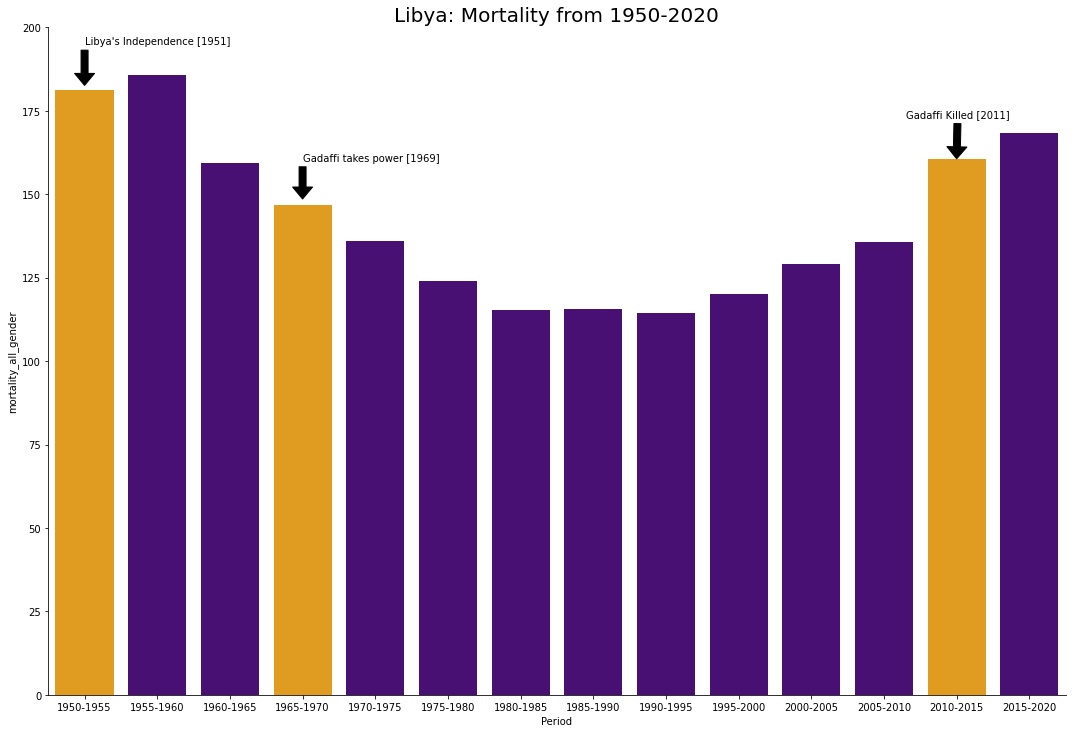

In [34]:
palette=['orange' if val in ['1950-1955','1965-1970','2010-2015'] else 'indigo' for val in consolidated_libya['Period'].to_list()]
g=sns.catplot(data=consolidated_libya,x='Period',y='mortality_all_gender',kind='bar',height=10, aspect=1.5,palette=palette)
plt.annotate('Gadaffi takes power [1969]', xy=(3,148), xytext=(3,160),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
plt.annotate('Libya\'s Independence [1951]', xy=(0,182), xytext=(0,195),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
plt.annotate('Gadaffi Killed [2011]', xy=(12,160), xytext=(11.3,173),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
g.set(ylim=(0, 200))
g.set_titles('Libya: Mortality from 1950-2020')
plt.title('Libya: Mortality from 1950-2020',fontsize=20)
#g.title()
# plt.axvline(x=2.5,color='green')
# plt.axvline(x=3.5,color='green')
# plt.axvline(x=11.5,color='red')
# plt.axvline(x=12.5,color='red')
plt.show()

In [35]:
melted_libya=consolidated_libya.melt(id_vars=['Country','Region','Period'],var_name='mortality_type',value_name='mortality')

In [36]:
melted_libya

,Country,Region,Period,mortality_type,mortality
0,Libya,Northern Africa,1950-1955,mortality_all_gender,181.252
1,Libya,Northern Africa,1955-1960,mortality_all_gender,185.881
2,Libya,Northern Africa,1960-1965,mortality_all_gender,159.423
3,Libya,Northern Africa,1965-1970,mortality_all_gender,146.729
4,Libya,Northern Africa,1970-1975,mortality_all_gender,135.906
5,Libya,Northern Africa,1975-1980,mortality_all_gender,124.096
6,Libya,Northern Africa,1980-1985,mortality_all_gender,115.421
7,Libya,Northern Africa,1985-1990,mortality_all_gender,115.490
8,Libya,Northern Africa,1990-1995,mortality_all_gender,114.401
9,Libya,Northern Africa,1995-2000,mortality_all_gender,120.234


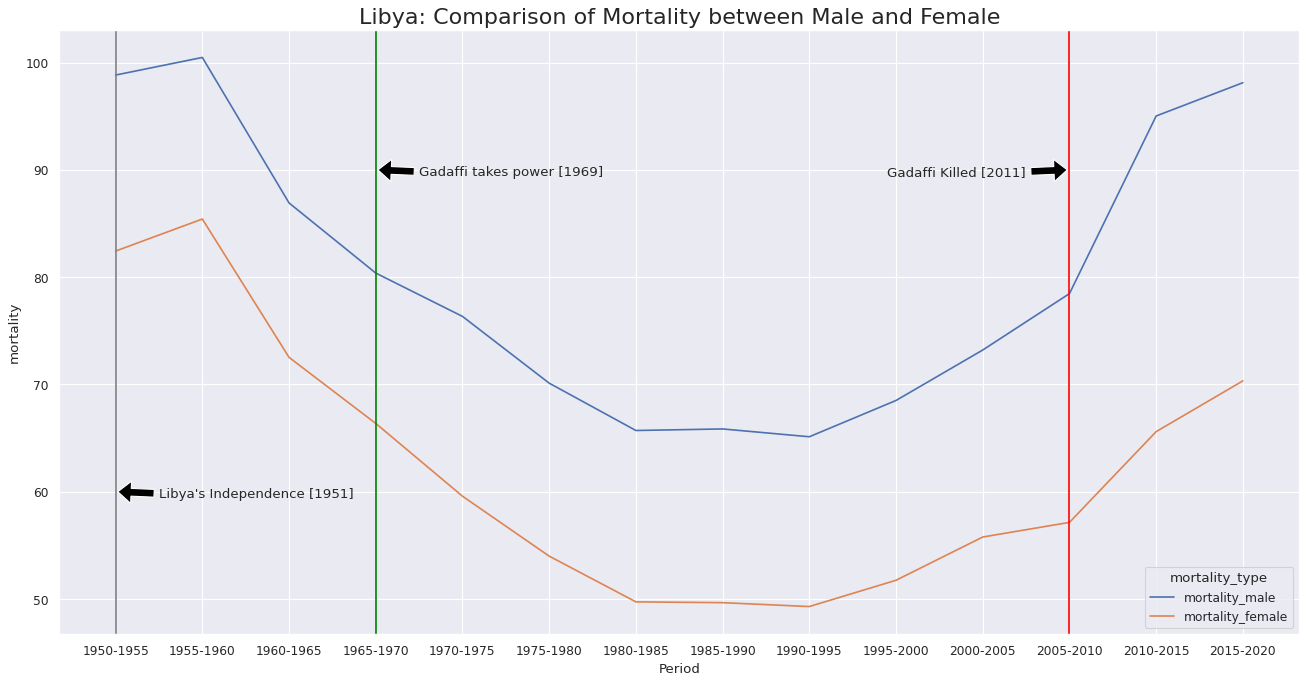

In [37]:
#sns.relplot(data=consolidated_libya,x='Period',y='mortality_all_gender',kind='bar')
#g=sns.catplot(data=melted_libya,x='Period',y='mortality',hue='mortality_type',kind='bar',height=10, aspect=1.5,)
sns.set_theme()
plt.figure(figsize=(20, 10), dpi=80)
sns.lineplot(data=melted_libya[melted_libya['mortality_type']!='mortality_all_gender'],
             x='Period',
             y='mortality',
             hue='mortality_type')
plt.xticks(rotation=0)
plt.axvline(x=3,color='green')
plt.axvline(x=11,color='red')
plt.axvline(x=0,color='grey')
plt.title('Libya: Comparison of Mortality between Male and Female',fontsize=20)
plt.annotate('Gadaffi takes power [1969]', xy=(3,90), xytext=(3.5,89.5),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
plt.annotate('Libya\'s Independence [1951]', xy=(0,60), xytext=(0.5,59.5),
             arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
plt.annotate('Gadaffi Killed [2011]', xy=(11,90), xytext=(8.9,89.5),
            arrowprops=dict(facecolor='black', shrink=0.05, headwidth=20, width=7))
plt.show()

In [38]:
def plot_correlation(df,x,y,hue,title,text_flag=True,text_pos=[0,0]):
  plt.figure(figsize=(20, 10), dpi=80)
  sns.scatterplot(data=df,
                  x=x,
                  y=y,hue=hue,s=100)
  if text_flag:
    plt.text(text_pos[0], text_pos[1],
            "Correlation coefficinet : {:.2f}".format(df[y].corr(consolidated_df[x])),
            horizontalalignment='left', 
            size='medium', 
            color='black', 
            weight='semibold')
  plt.title(title,fontsize=20)
  #plt.ylim(-4000,6000)
  plt.show()

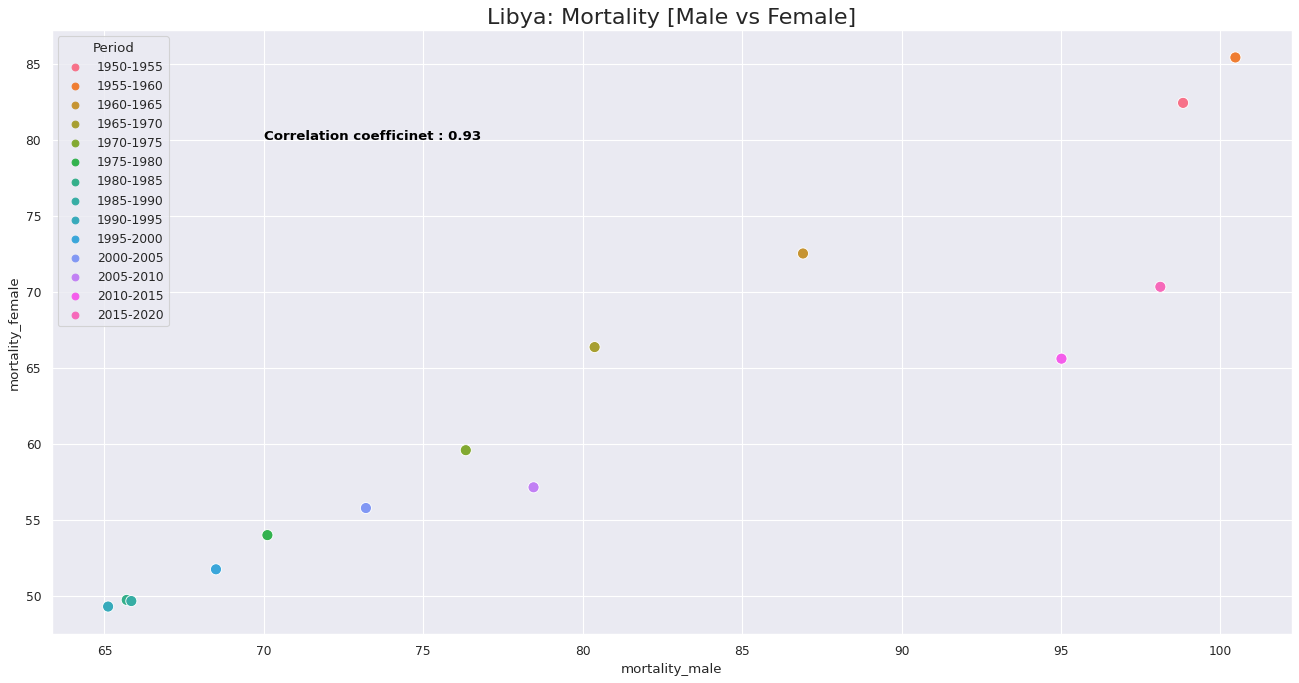

In [39]:
plot_correlation(consolidated_libya,'mortality_male','mortality_female','Period','Libya: Mortality [Male vs Female]',text_pos=[70,80])

## Hypothesis 2

<i>In most of the cases with an increase in life-expectancy rate, the net migration rate decreases i.e. life-expectancy rate and net migration are negatively correlated.</i>

### Correlating Life Expectancy with Net Migration 

* Net Migration is calculated as the number of IMMIGRANTS minus the number of EMIGRANTS. Expressed in thousands

* Life Expectancy is the the average number of years of life of individuals who would be subject to the mortality rates of a given period. It is expressed as years.



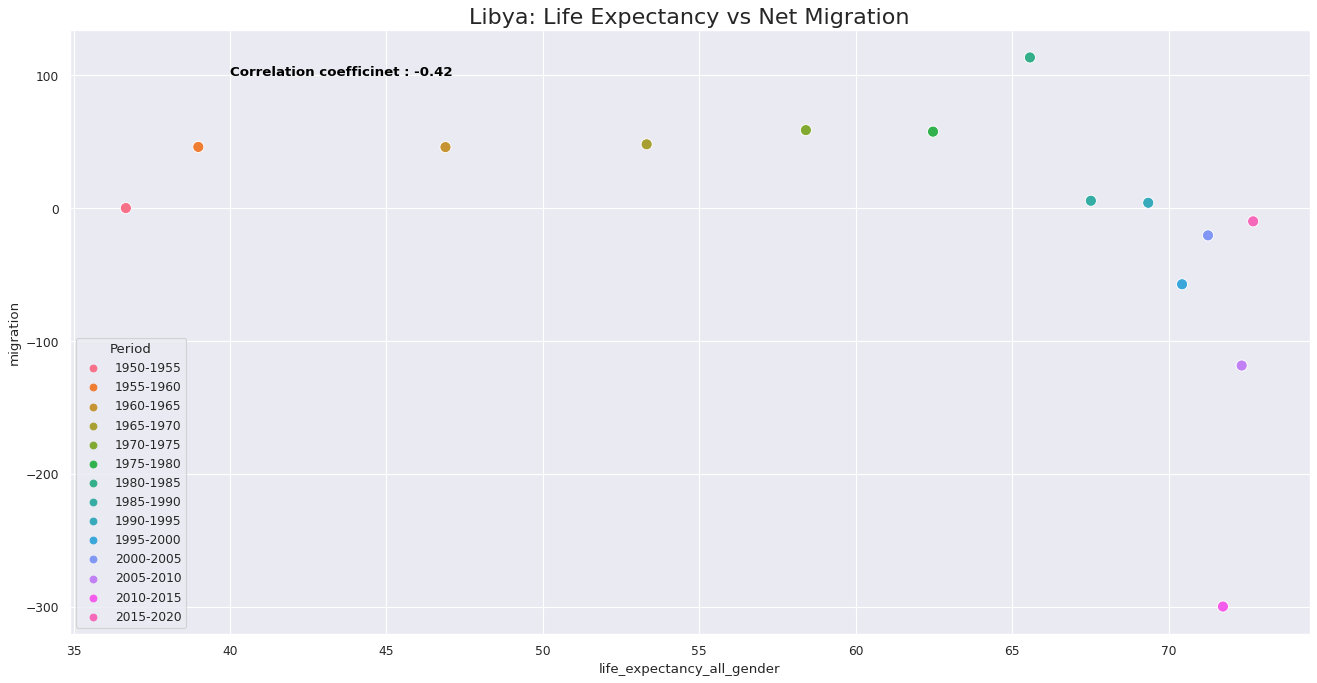

In [40]:
plot_correlation(consolidated_df[consolidated_df['Country']=='Libya'],
                 'life_expectancy_all_gender','migration','Period','Libya: Life Expectancy vs Net Migration',text_pos=[40,100])

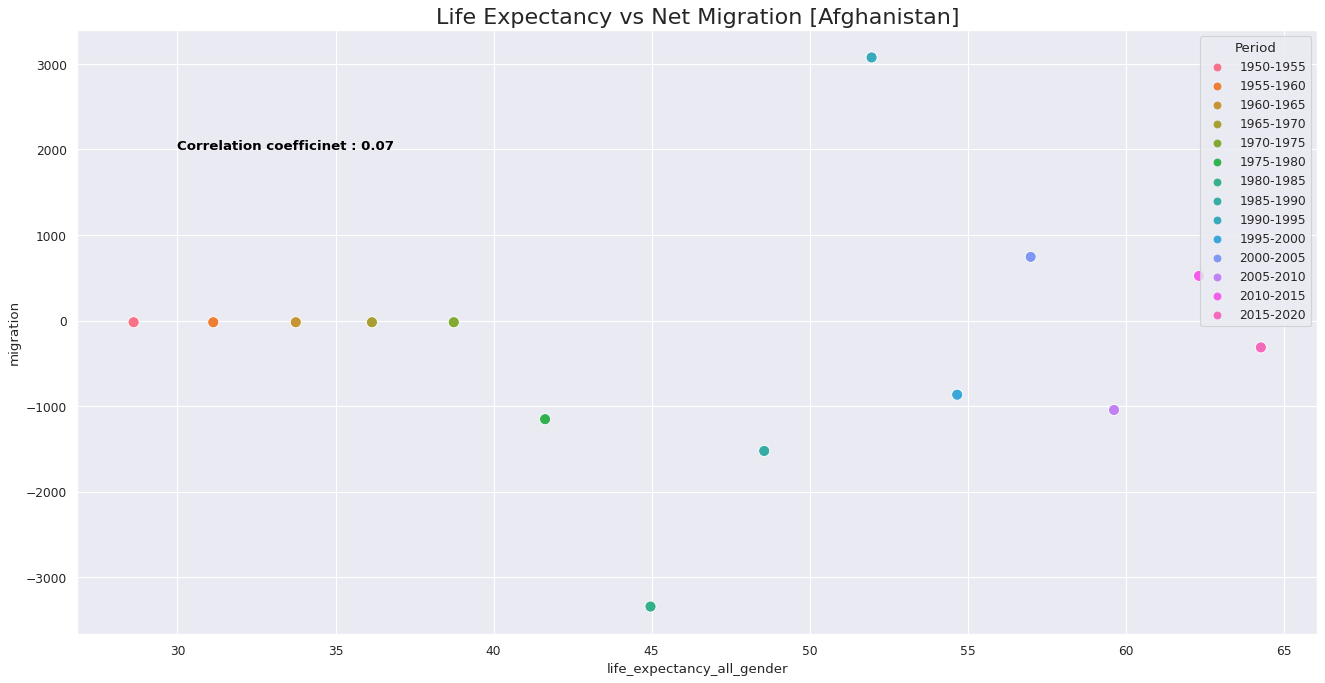

In [41]:
plot_correlation(consolidated_df[consolidated_df['Country']=='Afghanistan'],
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Afghanistan]',
                 text_pos=[30,2000])

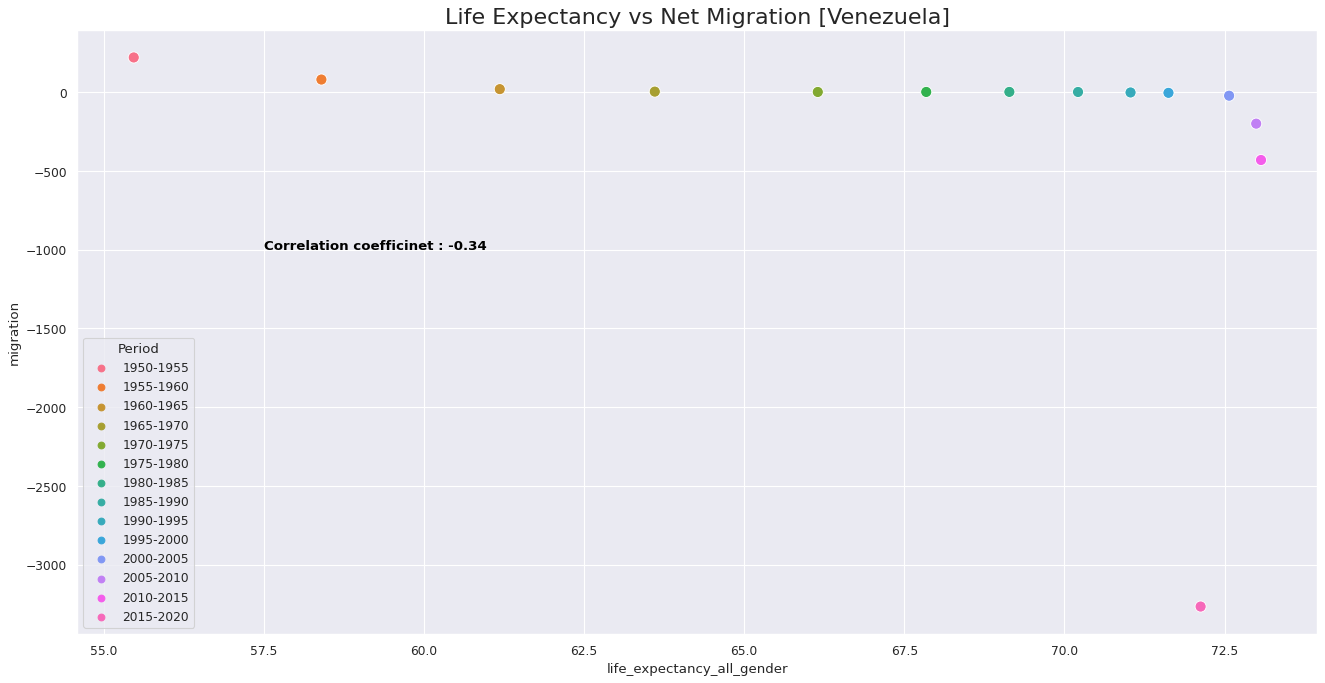

In [42]:
plot_correlation(consolidated_df[consolidated_df['Country'].str.contains('Venezuela')],
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Venezuela]',text_pos=[57.5,-1000])

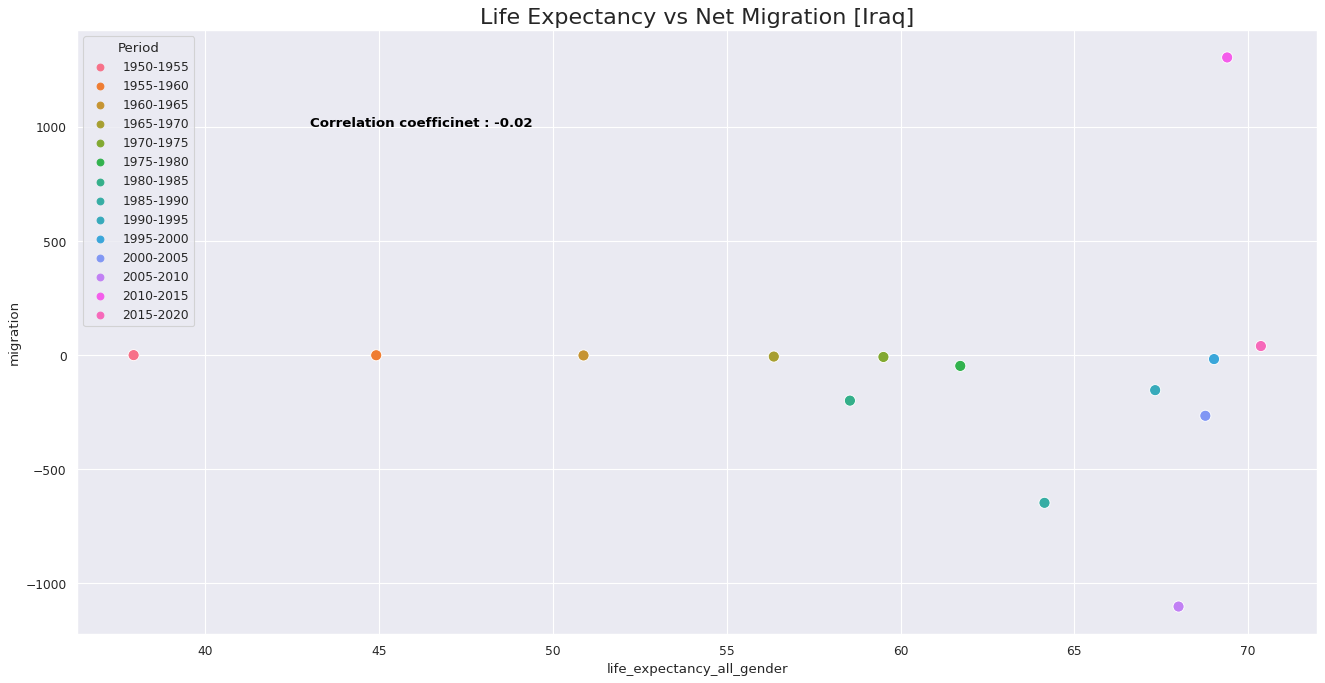

In [44]:
plot_correlation(consolidated_df[consolidated_df['Country'].str.contains('Iraq')],
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Iraq]',text_pos=[43,1000])

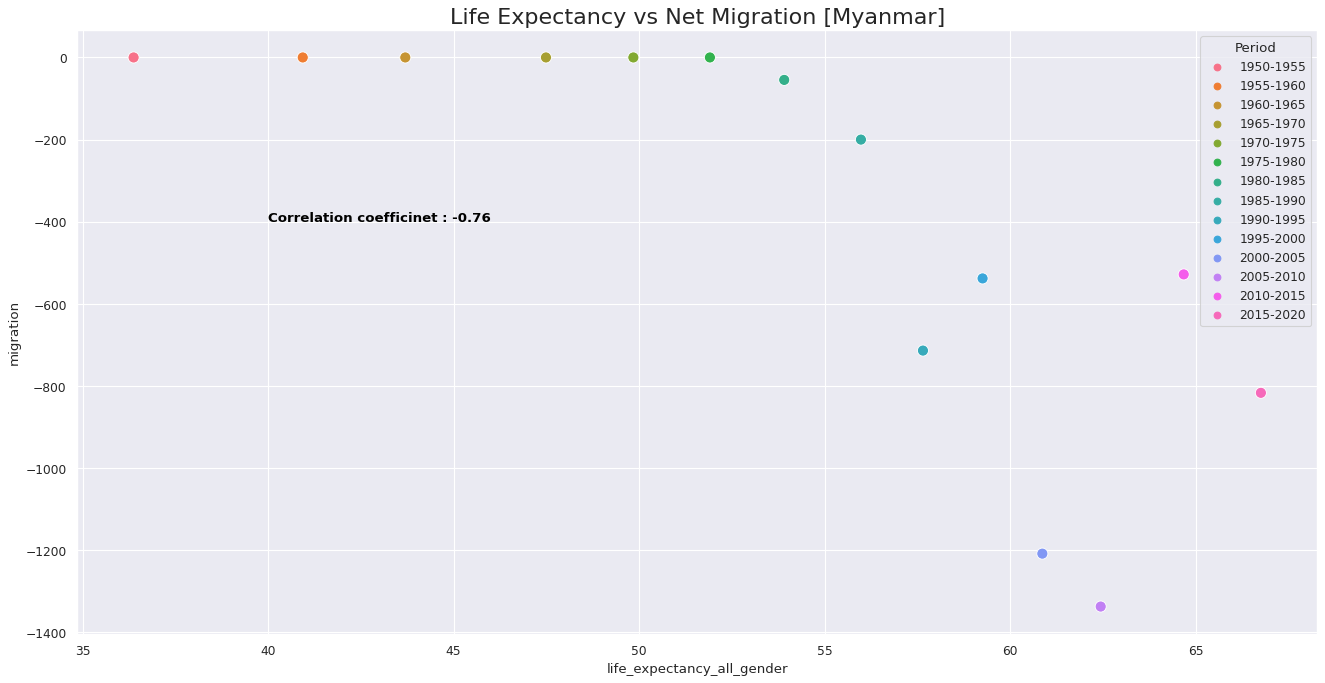

In [45]:
plot_correlation(consolidated_df[consolidated_df['Country'].str.contains('Myanmar')],
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Myanmar]',text_pos=[40,-400]) #

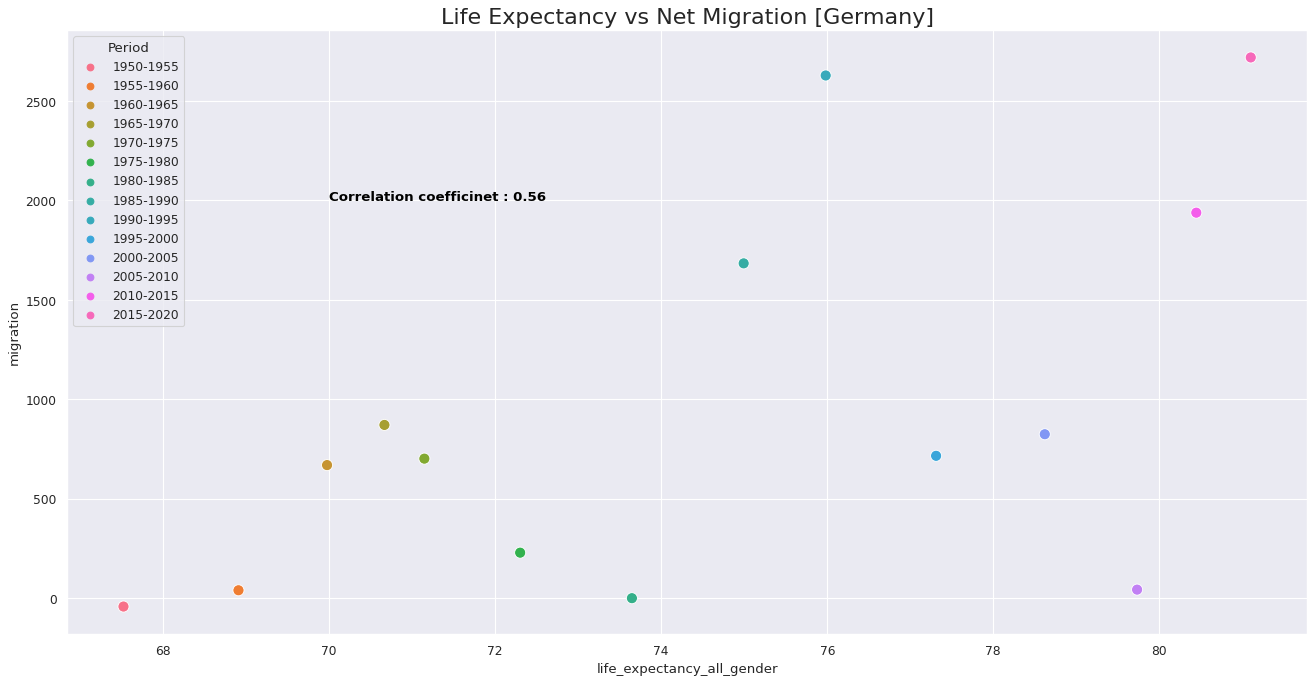

In [43]:
plot_correlation(consolidated_df[consolidated_df['Country'].str.contains('Germany')],
                 'life_expectancy_all_gender','migration','Period',
                 'Life Expectancy vs Net Migration [Germany]',text_pos=[70,2000])